In [1]:
import pandas as pd
from env import host, username, password

In [2]:
def get_zillow_data():
    """
    This function connects to the zillow database and retrieves data from the properties_2017 table for
    all 'Single Family Residential' properties. The resulting DataFrame contains the bedroomcnt, bathroomcnt,
    calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips columns and is returned by
    the function.
    """
   
    # create the connection url
    url = f'mysql+pymysql://{username}:{password}@{host}/zillow'

    # read the SQL query into a DataFrame
    query = '''
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            WHERE propertylandusetypeid = 261
            '''
    df = pd.read_sql(query, url)

    return df

In [3]:

import joblib

from sklearn.preprocessing import StandardScaler
import joblib



In [4]:
df =get_zillow_data()

In [14]:

from sklearn.preprocessing import StandardScaler

def prep_zillow(df):
    """
    This function takes in the Zillow DataFrame and does the following:
    - Drops any rows with missing values
    - Scales the numerical columns using StandardScaler
    - Returns the cleaned and scaled DataFrame
    """
    
    # Drop any rows with missing values
    df.dropna(inplace=True)
    
    # Separate the numerical columns from the categorical columns
    num_cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount']
    cat_cols = ['fips']
    num_df = df[num_cols]
    cat_df = df[cat_cols]
    
    # Scale the numerical columns using StandardScaler
    scaler = StandardScaler()
    num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_cols, index=num_df.index)
    
    # Save the scaler object for inverse_transform
    scaler_file = f"{scaler.__class__.__name__}_model.pkl"
    joblib.dump(scaler, scaler_file)
    
    # Inverse transform the scaled numerical columns
    num_df_unscaled = pd.DataFrame(scaler.inverse_transform(num_df_scaled), columns=num_cols, index=num_df.index)
    
    # Combine the unscaled numerical columns and categorical columns
    cleaned_df = pd.concat([num_df_unscaled, cat_df], axis=1)
    
    # Return the cleaned and scaled DataFrame
    return cleaned_df


In [6]:
df = prep_zillow(df)

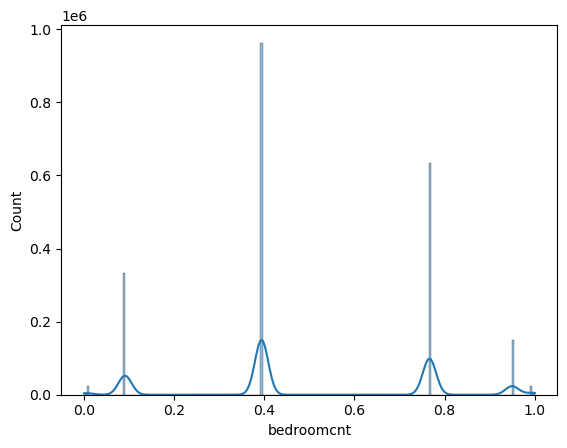

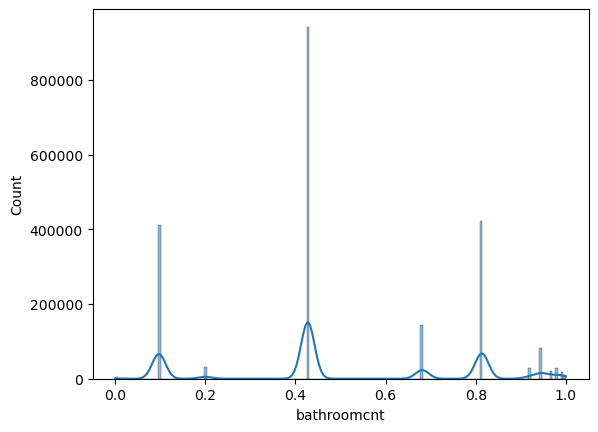

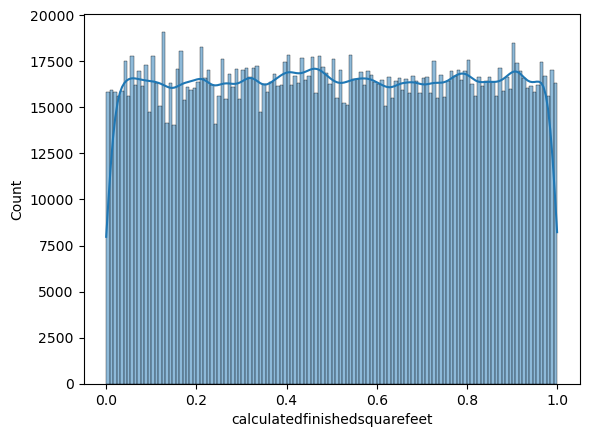

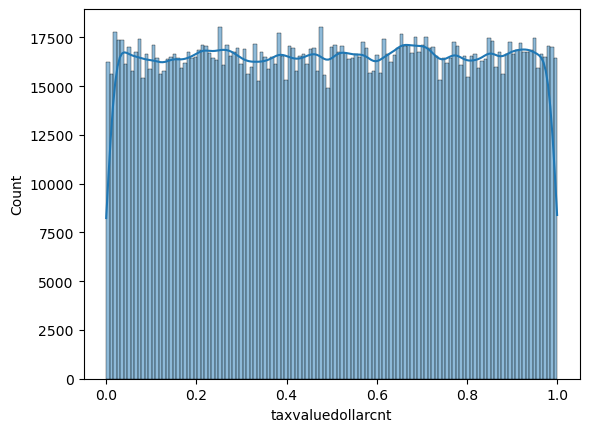

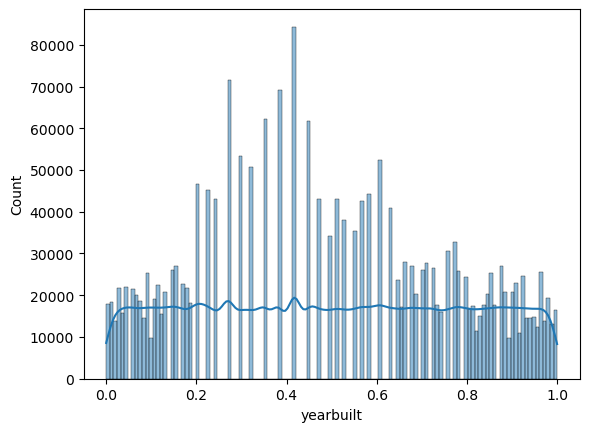

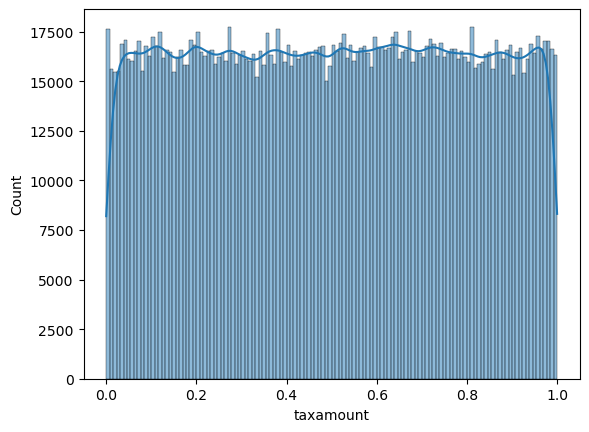

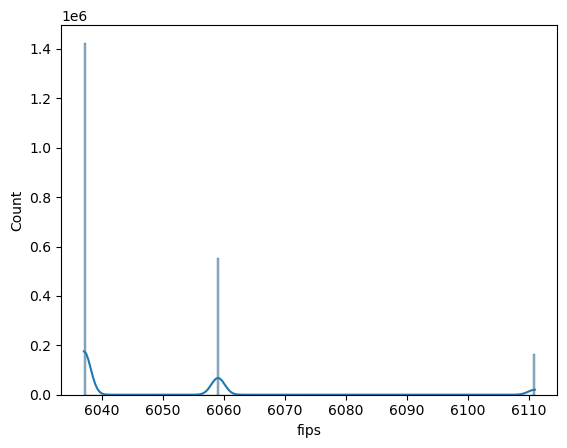

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# create histograms for each column
for col in df.columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

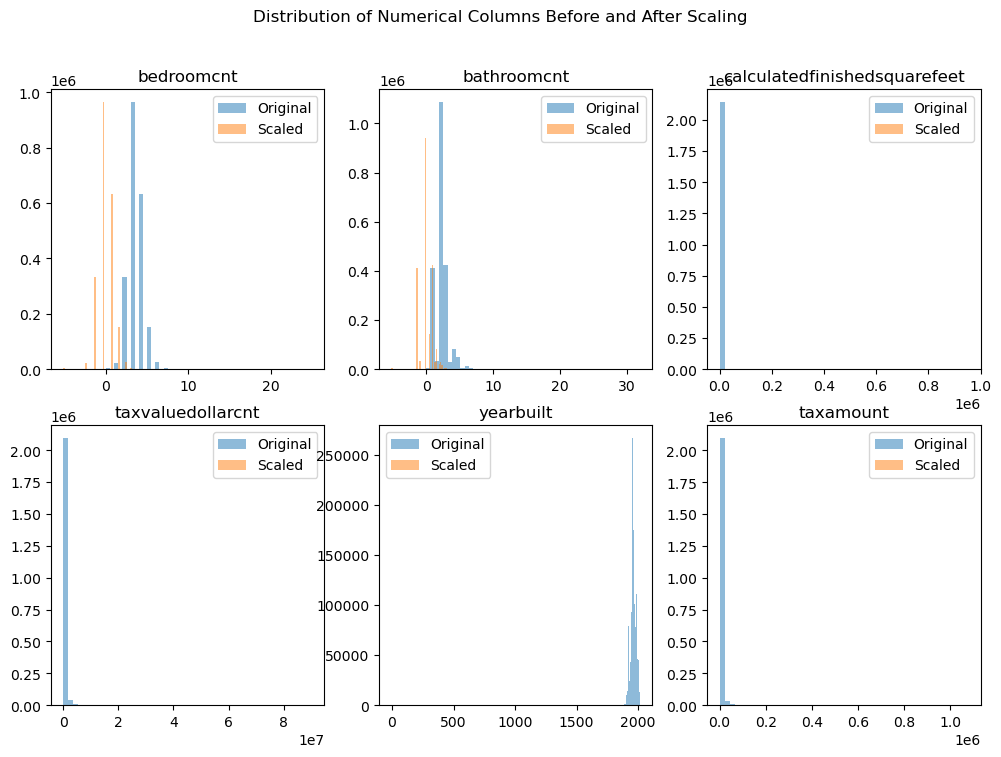

    bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
4     0.733156    -0.174005                      1.693548          -0.134824   
6    -0.265284     1.606755                     -0.001255           1.276382   
7    -0.265284    -0.174005                      0.550589           0.927480   
11   -5.199338    -5.199338                     -0.814401          -3.435316   
14   -5.199338    -5.199338                     -3.336897          -3.363547   

    yearbuilt  taxamount    fips  
4    1.942703   0.792753  6037.0  
6    2.408550   1.300991  6037.0  
7   -1.449682   0.978047  6037.0  
11   0.567211  -3.416035  6037.0  
14   0.604448  -3.112610  6037.0  


In [17]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

def prep_zillow(df):
    """
    This function takes in the Zillow DataFrame and does the following:
    - Drops any rows with missing values
    - Scales the numerical columns using QuantileTransformer
    - Returns the cleaned and scaled DataFrame
    """
    
    # Drop any rows with missing values
    df.dropna(inplace=True)
    
    # Separate the numerical columns from the categorical columns
    num_cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount']
    cat_cols = ['fips']
    num_df = df[num_cols]
    cat_df = df[cat_cols]
    
    # Scale the numerical columns using QuantileTransformer
    scaler = QuantileTransformer(output_distribution='normal')
    num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_cols, index=num_df.index)
    
    # Combine the scaled numerical columns and categorical columns
    cleaned_df = pd.concat([num_df_scaled, cat_df], axis=1)
    
    # Visualize the result of scaling
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    axs = axs.flatten()
    for i, col in enumerate(num_cols):
        axs[i].hist(num_df[col], bins=50, alpha=0.5, label="Original")
        axs[i].hist(num_df_scaled[col], bins=50, alpha=0.5, label="Scaled")
        axs[i].legend()
        axs[i].set_title(col)
    fig.suptitle("Distribution of Numerical Columns Before and After Scaling")
    plt.show()
    
    # Return the cleaned and scaled DataFrame
    return cleaned_df

# Testing the function
cleaned_df = prep_zillow(df)
print(cleaned_df.head())

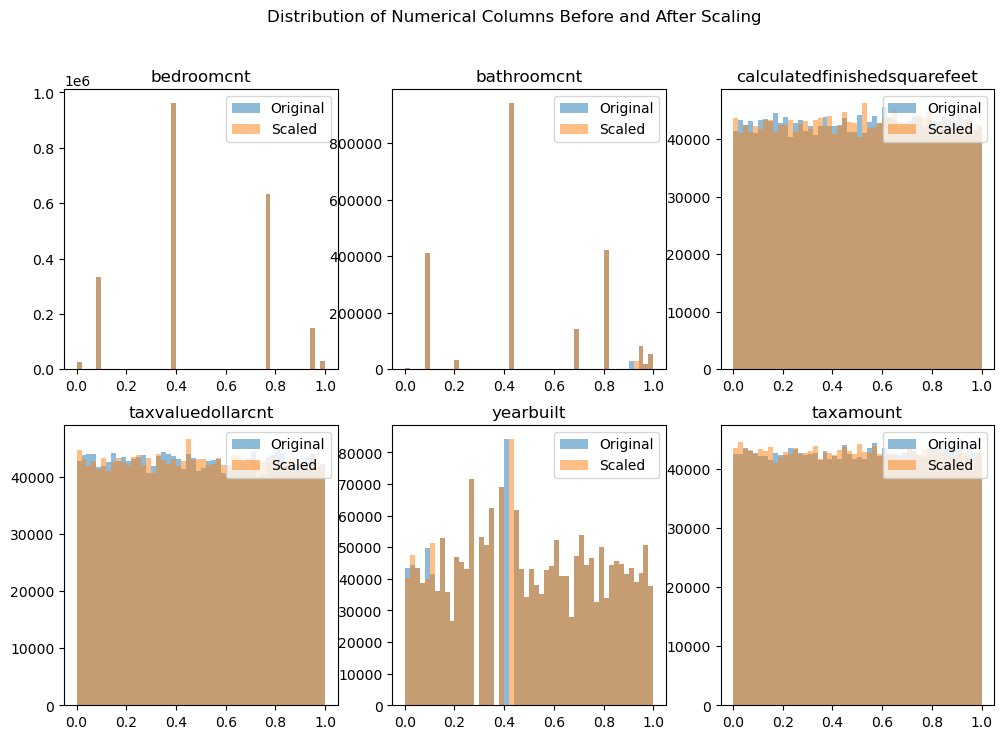

    bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
4     0.767267     0.430430                      0.954385           0.447032   
6     0.393393     0.946947                      0.501502           0.899015   
7     0.393393     0.430430                      0.709710           0.822220   
11    0.000000     0.000000                      0.208709           0.000251   
14    0.000000     0.000000                      0.000318           0.000326   

    yearbuilt  taxamount    fips  
4    0.974474   0.783620  6037.0  
6    0.991992   0.902765  6037.0  
7    0.076076   0.832983  6037.0  
11   0.715716   0.000197  6037.0  
14   0.728228   0.000807  6037.0  


In [14]:

def prep_zillow(df):
    """
    This function takes in the Zillow DataFrame and does the following:
    - Drops any rows with missing values
    - Scales the numerical columns using QuantileTransformer
    - Returns the cleaned and scaled DataFrame
    """
    
    # Drop any rows with missing values
    df.dropna(inplace=True)
    
    # Separate the numerical columns from the categorical columns
    num_cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount']
    cat_cols = ['fips']
    num_df = df[num_cols]
    cat_df = df[cat_cols]
    
    # Scale the numerical columns using QuantileTransformer
    scaler = QuantileTransformer()
    num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_cols, index=num_df.index)
    
    # Combine the scaled numerical columns and categorical columns
    cleaned_df = pd.concat([num_df_scaled, cat_df], axis=1)
    
    # Visualize the result of scaling
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    axs = axs.flatten()
    for i, col in enumerate(num_cols):
        axs[i].hist(num_df[col], bins=50, alpha=0.5, label="Original")
        axs[i].hist(num_df_scaled[col], bins=50, alpha=0.5, label="Scaled")
        axs[i].legend()
        axs[i].set_title(col)
    fig.suptitle("Distribution of Numerical Columns Before and After Scaling")
    plt.show()
    
    # Return the cleaned and scaled DataFrame
    return cleaned_df

# Testing the function
cleaned_df = prep_zillow(df)
print(cleaned_df.head())


# When we omit the `output_distribution` argument, the `QuantileTransformer` uses the default
#  'uniform' distribution. The resulting histograms show that the scaled features have a more uniform
#  distribution compared to the original features. This can be seen in the flattened shape of the histograms
#  in the scaled subplot. Overall, the function still performs the necessary cleaning and scaling of the data.

In [ ]:
# done